In [16]:
from google.colab import drive
import os
import numpy as np
import time

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/Datasets/refined posture dataset"


postures1   postures2  postures4  postures6  postures8
postures10  postures3  postures5  postures7  postures9


In [0]:
cwd = os.getcwd()

dataset_location = '/drive/My Drive/Datasets/refined posture dataset'
folder_num = 1
data = cwd + dataset_location + '/postures'
current_folder = data + str(folder_num)


In [0]:
# load all bends

def load_and_convert(posture_type):
	posture_type = str(posture_type)
	np_data = []

	print("Loading and converting " + posture_type + "...\n")
	# iterate over all 'bend' folders
	for i in range(1,11): 
		current_folder = data + str(i) + '//' + posture_type	
		# get file names in folder
		folder = os.listdir(current_folder)

		# load and convert each image to numpy array
		for image in folder:
			img = load_img(current_folder + '//' + image)

			# convert to numpy array
			img_array = img_to_array(img)
			np_data.append(img_array)
			
	return np_data

In [5]:
start = time.time()
all_bends = load_and_convert('bend')
all_lie = load_and_convert('lie')
all_sit = load_and_convert('sit')
all_stand = load_and_convert('stand')
end = time.time()
print(end - start)

# Time taken: 713.5104157924652 

Loading and converting bend...

Loading and converting lie...

Loading and converting sit...

Loading and converting stand...

713.5104157924652


In [0]:
label_names = ['bend', 'lie', 'sit', 'stand']

all_images = []
all_images.extend(all_bends)
all_images.extend(all_lie)
all_images.extend(all_sit)
all_images.extend(all_stand)
len(all_images)

# return a list of label names of length of the 
# given posture array
def createLabels(lbl_name, posture_arr):
  label = []
  for i in range(len(posture_arr)):
    label.append(lbl_name)
  return label

# generate labels arrays of the correct length
bend_labels = createLabels(0, all_bends)
lie_labels = createLabels(1, all_lie)
sit_labels = createLabels(2, all_sit)
stand_labels = createLabels(3, all_stand)

labels = []
labels.extend(bend_labels)
labels.extend(lie_labels)
labels.extend(sit_labels)
labels.extend(stand_labels)


In [0]:
from sklearn.model_selection import train_test_split

all_images = np.asarray(all_images)
labels = np.asarray(labels)
l = np.reshape(labels, (len(labels),1))


train_images, test_images, train_labels, test_labels = train_test_split(all_images, l, test_size = 0.40)

train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
def singleConv():
  model = models.Sequential()
  model.add(layers.Conv2D(30, (2, 2), activation='relu', input_shape=(30, 30, 2)))
  model.add(layers.MaxPooling2D((2, 2)))
  return model

def test():
  model = models.Sequential()
  model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(30, 30, 3)))
  model.add(layers.MaxPooling2D((2, 2)))

  return model

def doubleConv2D():
  model = models.Sequential()
  model.add(layers.Conv2D(60, (2, 2), activation='relu', input_shape=(30, 30, 2)))


  return model


def flattenLayers(model):
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.summary()
  # tf.keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)
  return model

In [143]:
net = test()
convNet = flattenLayers(net)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 30)        840       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                376384    
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 377,484
Trainable params: 377,484
Non-trainable params: 0
_________________________________________________________________


In [138]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(2154, 30, 30, 3)
(2154, 1)
(1062, 30, 30, 3)
(1062, 1)
1062


In [144]:
# build and compile
convNet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = convNet.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
61/61 [==============================] - 1s 23ms/step - loss: 0.2701 - accuracy: 0.9020 - val_loss: 0.1284 - val_accuracy: 0.9557
Epoch 2/10
61/61 [==============================] - 2s 26ms/step - loss: 0.0755 - accuracy: 0.9730 - val_loss: 0.0740 - val_accuracy: 0.9790
Epoch 3/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.0559 - val_accuracy: 0.9790
Epoch 4/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0446 - val_accuracy: 0.9907
Epoch 5/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0120 - accuracy: 0.9979 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 6/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 0.0369 - val_accuracy: 0.9915
Epoch 7/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0272 - val_accuracy: 0.9946
Epoch 8/10
61

34/34 - 0s - loss: 0.0329 - accuracy: 0.9962
Loss:  0.03294416889548302
Accuracy:  0.9962335228919983
68/68 - 0s - loss: 2.1808e-04 - accuracy: 1.0000
Training loss 0.0002180765150114894
Training accuracy 1.0


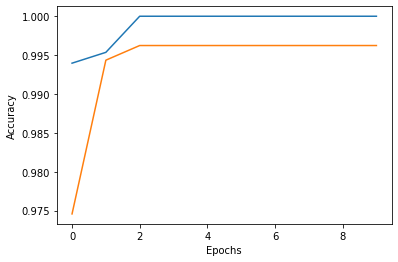

In [139]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

test_loss, test_acc = convNet.evaluate(test_images,  test_labels, verbose=2)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

train_loss, train_acc = convNet.evaluate(train_images, train_labels, verbose=2)
print("Training loss", train_loss)
print("Training accuracy", train_acc)

